# imports

In [27]:
import cv2
import os
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# create the model

In [29]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])


# Load the MNIST dataset

In [15]:
(train_images, train_labels), (test_images,
                               test_labels) = tf.keras.datasets.mnist.load_data()


# train the model

In [30]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 29s 14ms/step - loss: 0.2513 - accuracy: 0.9429
Epoch 2/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0666 - accuracy: 0.9799
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0514 - accuracy: 0.9848
Epoch 4/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0447 - accuracy: 0.9865
Epoch 5/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0375 - accuracy: 0.9890
Epoch 6/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0329 - accuracy: 0.9901
Epoch 7/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 8/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0286 - accuracy: 0.9914
Epoch 9/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0221 - accuracy: 0.9931
Epoch 10/20
1875/1875 [==============================] - 38s 20m

# test the model's accuracy

In [17]:
loss, accuracy = model.evaluate(test_images,test_labels)

print(f"loss: {loss}, accuracy: {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2055 - accuracy: 0.9571
loss: 0.20551592111587524, accuracy: 0.957099974155426


# save the model to file

In [48]:
model.save("number_recognition.model")

INFO:tensorflow:Assets written to: number_recognition.model\assets


INFO:tensorflow:Assets written to: number_recognition.model\assets


# load model from file

In [3]:
model = tf.keras.models.load_model("number_recognition.model")

# make prediction from images in digits folder

In [ ]:
files = os.listdir("digits")

for i in range(len(files)):
    img = cv2.imread(f"digits/{files[i]}")[:, :, 0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    plt.imshow(img[0])
    plt.show()
    print(f"prediction: {np.argmax(prediction)}")

# Draw and predict drawing

1/1 [==============================] - 0s 45ms/step
prediction: 9


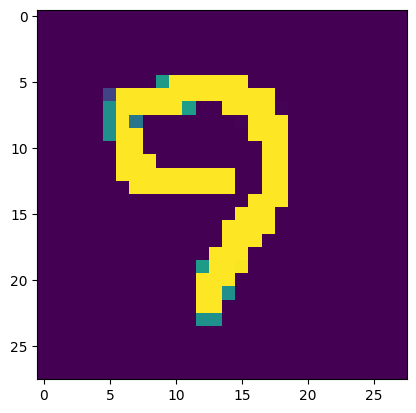

In [46]:
# Create a 28x28 black and white image
img = np.zeros((280, 280), dtype=np.uint8)


def paint(event):
    # Get the x,y coordinates of the mouse
    x1, y1 = (event.x - 10), (event.y - 10)
    x2, y2 = (event.x + 10), (event.y + 10)

    # Draw a rectangle at the mouse position
    canvas.create_rectangle(x1, y1, x2, y2, fill="black")

    # Update the image array with the new pixel values
    img[y1:y2, x1:x2] = 255


def save_image():
    # Resize and Save the image to a numpy array
    img2 = np.array([cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)])

    plt.imshow(img2[0])

    print(f"prediction: {np.argmax(model.predict(img2))}")

    root.destroy()


# Create a window with a drawing canvas
root = tk.Tk()
canvas = tk.Canvas(root, width=280, height=280)
canvas.pack(expand=tk.YES, fill=tk.BOTH)
canvas.bind("<B1-Motion>", paint)

# Add a button to save the image
button = tk.Button(root, text="Save Image", command=save_image)
button.pack()

root.mainloop()
